In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
import itertools

**1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.**

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


In [5]:
data_m = data.resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


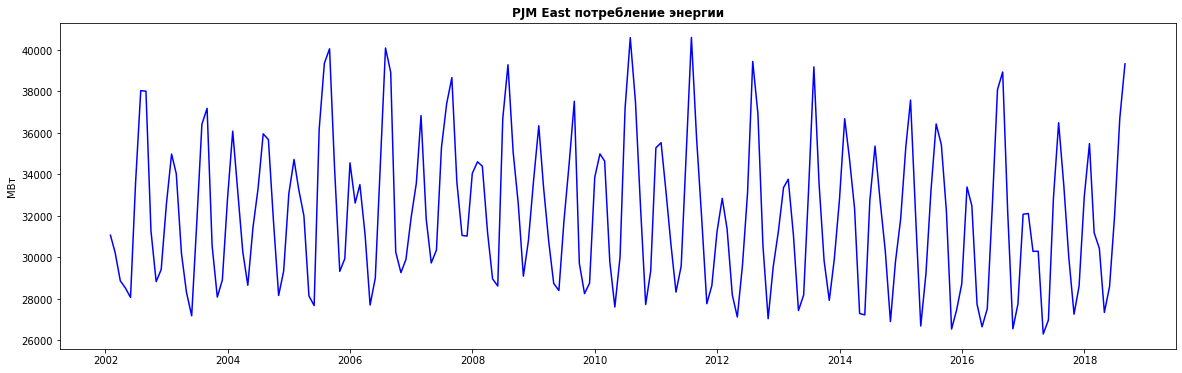

In [13]:
plt.figure(figsize =(20,6))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии', fontweight = 'bold')
plt.ylabel ( 'МВт' )
plt.show()

**2. Подберите параметры модели SARIMAX для этого ряда.**

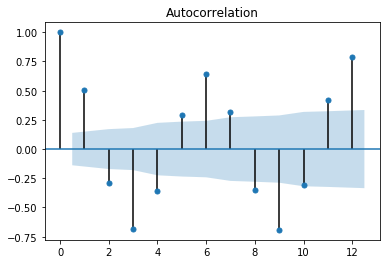

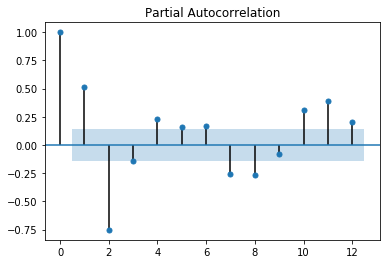

In [19]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

In [20]:
# Определим p, d и q 
p = 1   # определяем по графику автокорреляции 
d = 1   # практически всегда 1
q = 1   # определяем по графику частичной автокорреляции 

pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
# будем работать с месячными данными, тогда сезонность это 12 недель
ps = 0
ds = 0
qs = 1

seasonal_pdq = [ps, ds, qs ,24] 

In [22]:
import warnings

#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order = pdq,
                                seasonal_order = seasonal_pdq ,
                                enforce_stationarity = False ,
                                enforce_invertibility = False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 1, 1]x[0, 0, 1, 24] - AIC:2998.835473329964


In [23]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 24)   Log Likelihood               -1495.418
Date:                            Sat, 11 Jul 2020   AIC                           2998.835
Time:                                    13:36:27   BIC                           3011.161
Sample:                                         0   HQIC                          3003.840
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

можно посмотреть на остатки ряда (results.resid) с точки зрения автокорреляции. Видим ярковыраженную сезонность.

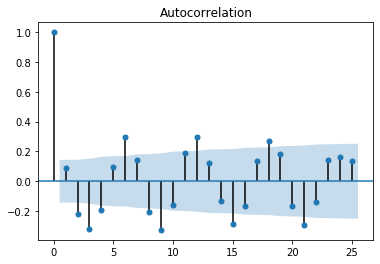

In [25]:
sm.graphics.tsa.plot_acf(results.resid, lags=25)
plt.show()

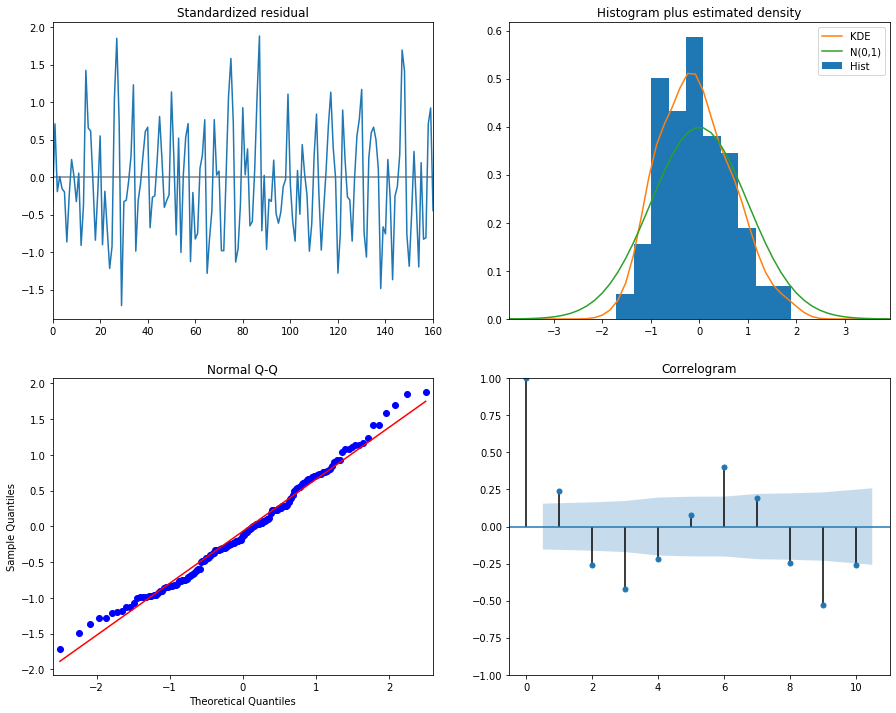

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [31]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [75]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 24)3 - AIC:3739.6561215158354
ARIMA(0, 0, 0)x(0, 0, 2, 24)3 - AIC:5532.888934770277
ARIMA(0, 0, 0)x(0, 1, 0, 24)3 - AIC:2971.5668206658843
ARIMA(0, 0, 0)x(0, 1, 1, 24)3 - AIC:2522.8166852431696
ARIMA(0, 0, 0)x(0, 1, 2, 24)3 - AIC:4900.220612264769
ARIMA(0, 0, 1)x(0, 0, 0, 24)3 - AIC:4259.47936122121
ARIMA(0, 0, 1)x(0, 0, 1, 24)3 - AIC:3683.132459306449
ARIMA(0, 0, 1)x(0, 0, 2, 24)3 - AIC:12144.550082047266
ARIMA(0, 0, 1)x(0, 1, 0, 24)3 - AIC:2924.153713894319
ARIMA(0, 0, 1)x(0, 1, 1, 24)3 - AIC:2479.5630695123045
ARIMA(0, 0, 1)x(0, 1, 2, 24)3 - AIC:4758.881073932479
ARIMA(0, 0, 2)x(0, 0, 0, 24)3 - AIC:4206.520029702065
ARIMA(0, 0, 2)x(0, 0, 1, 24)3 - AIC:3655.0466407221224
ARIMA(0, 0, 2)x(0, 0, 2, 24)3 - AIC:5587.496152765729
ARIMA(0, 0, 2)x(0, 1, 0, 24)3 - AIC:2908.485813491814
ARIMA(0, 0, 2)x(0, 1, 1, 24)3 - AIC:2462.368425401232
ARIMA(0, 0, 2)x(0, 1, 2, 24)3 - AIC:4819.10373204517
ARIMA(0, 1, 0)x(0, 0, 0,

Лучшие результаты на недельных данных параметры модели SARIMA(0, 1, 2)x(0, 1, 1, 24) - AIC:2408 (для p,q,d,ps,ds,qs из диапазона [0,1,2])

In [231]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[0:-12],order=[0,1,2],
                                seasonal_order=[0,1,1,24] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print(f'AIC:\n{ results_opt.aic}')

AIC:
2408.003155371279


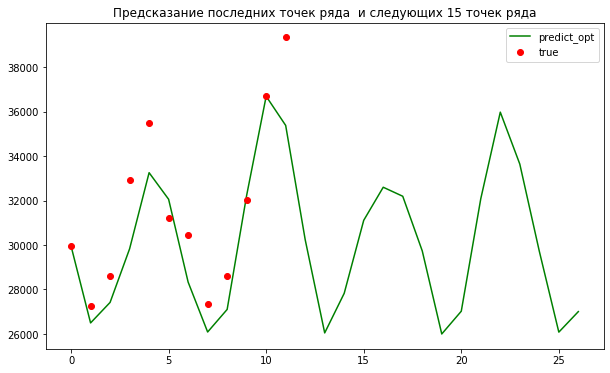

In [235]:
pred_dynamic = results.forecast(27)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(27)

plt.figure(figsize =(10,6))
#plt.plot(pred_dynamic, label='predict' )  #вообще где то в космосе
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 15 точек ряда')
plt.legend()

plt.show()

**3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.**

Показатель AIC лучше, чем на недельной модели. Это получилось за счет меньшей волатильности за счет усреднения цифр. Но пока есть к чему стремиться.

**4. Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )**

In [86]:
covid = pd.read_csv('covid_19_data.csv', index_col=[1], parse_dates=[1])

covid.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [87]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14491 entries, 2020-01-22 to 2020-04-12
Data columns (total 7 columns):
SNo               14491 non-null int64
Province/State    7386 non-null object
Country/Region    14491 non-null object
Last Update       14491 non-null object
Confirmed         14491 non-null float64
Deaths            14491 non-null float64
Recovered         14491 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 905.7+ KB


In [88]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,14491.00000,14491.000000,14491.000000,14491.000000
mean,7246.00000,1884.213650,96.049962,461.239666
std,4183.33571,10414.711173,831.546009,3875.410927
min,1.00000,0.000000,0.000000,0.000000
25%,3623.50000,6.000000,0.000000,0.000000
50%,7246.00000,66.000000,0.000000,1.000000
75%,10868.50000,435.000000,5.000000,32.000000
max,14491.00000,189033.000000,19899.000000,64281.000000


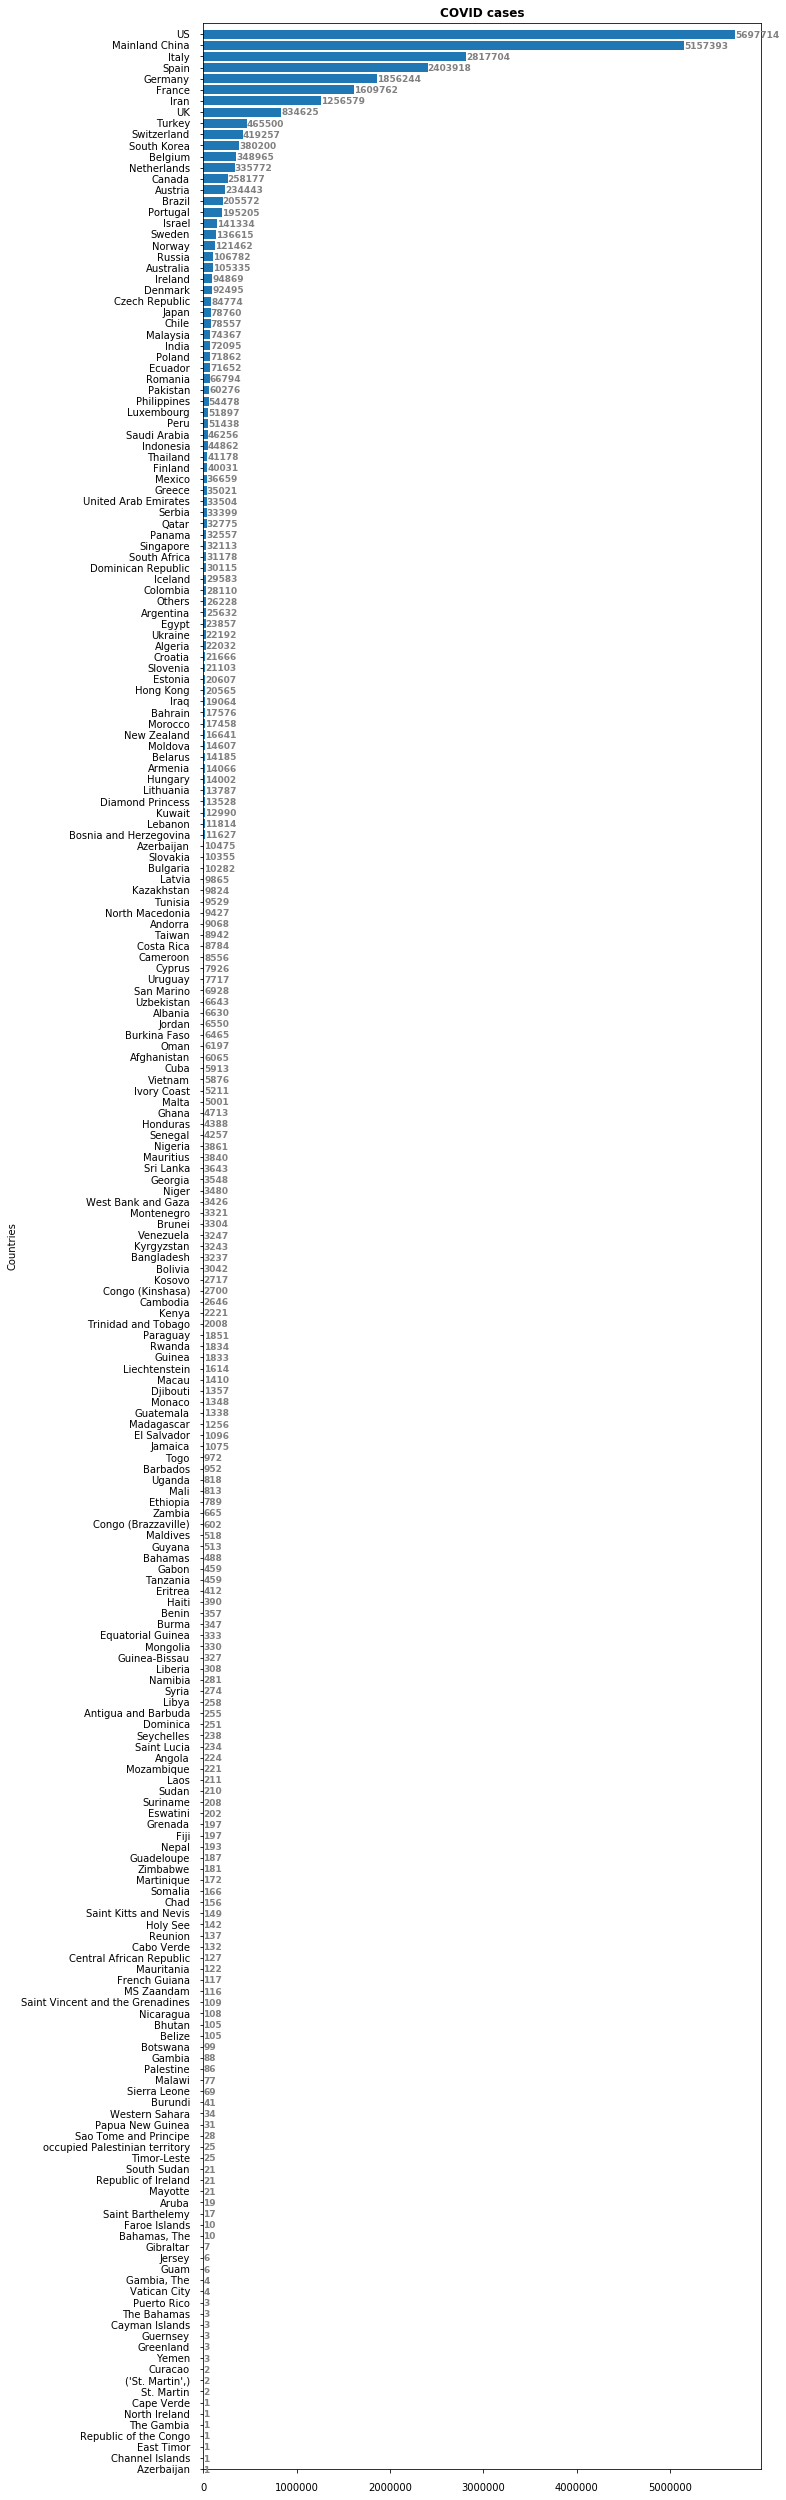

In [203]:
fig, ax = plt.subplots(figsize =(10,45)) 
ax.barh(covid.groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending=True).keys(),
         covid.groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending=True).astype('int'))
ax.tick_params(axis='both', which='major', pad=10)

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.9, i.get_y()+0.1,  
             str(round((i.get_width()), 2)), 
             fontsize = 9, fontweight ='bold', 
             color ='grey') 

plt.title('COVID cases', fontweight = 'bold')
plt.ylabel ( 'Countries' )
plt.ylim(0,220)
plt.show()

In [224]:
covid_d = covid[covid['Country/Region'] == 'UK']['Confirmed'].resample('D').sum()
covid_d

ObservationDate
2020-01-31        2.0
2020-02-01        2.0
2020-02-02        2.0
2020-02-03        2.0
2020-02-04        2.0
               ...   
2020-04-08    61474.0
2020-04-09    65872.0
2020-04-10    74605.0
2020-04-11    79874.0
2020-04-12    85206.0
Freq: D, Name: Confirmed, Length: 73, dtype: float64

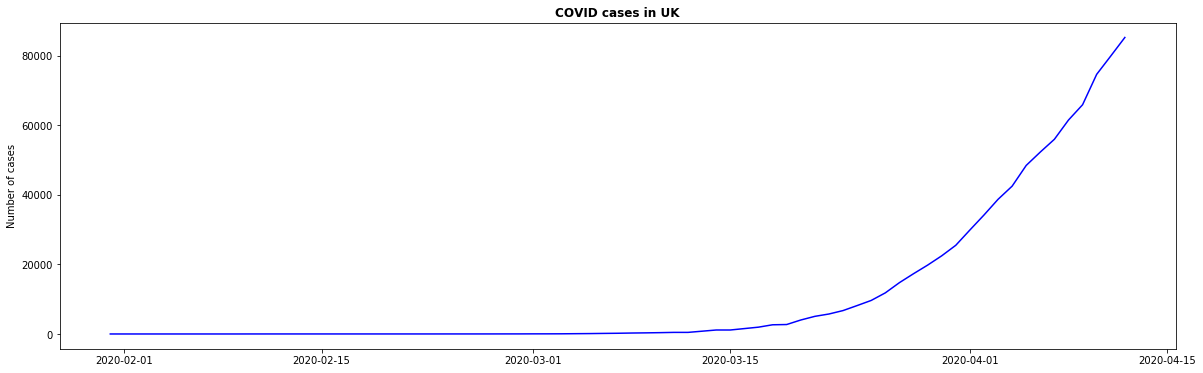

In [225]:
plt.figure(figsize =(20,6))
plt.plot( covid_d, 'b' )
plt.title('COVID cases in UK', fontweight = 'bold')
plt.ylabel ( 'Number of cases' )
plt.show()

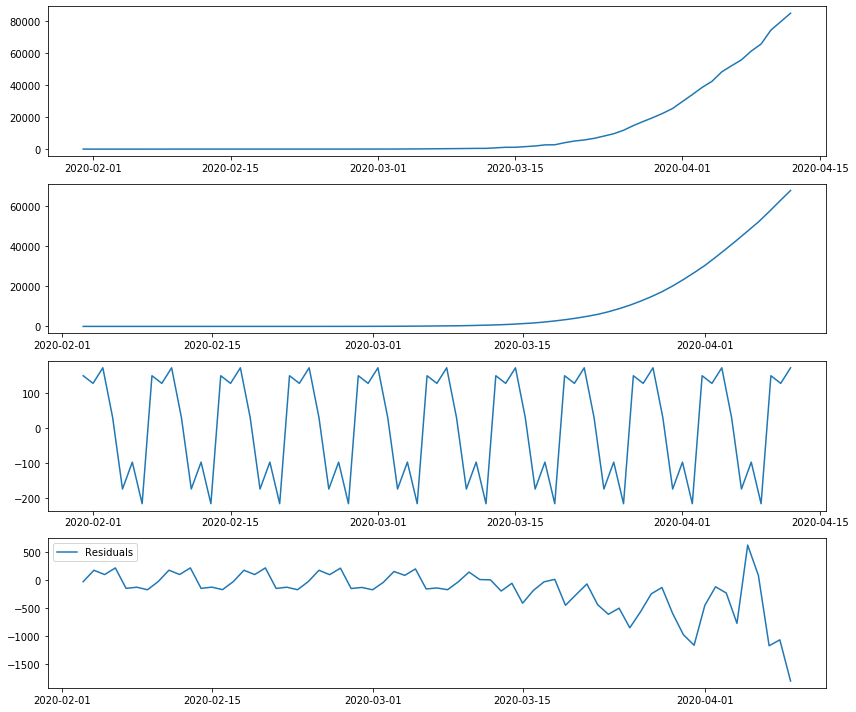

In [230]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(covid_d)
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(covid_d, label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

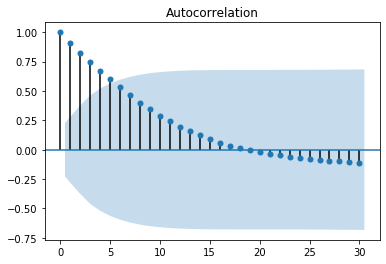

In [226]:
sm.graphics.tsa.plot_acf(covid_d.values, lags=15*2)
plt.show()

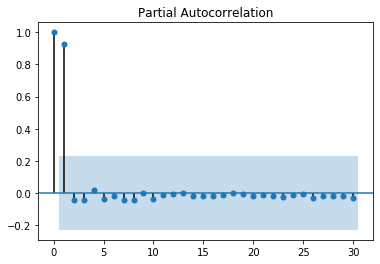

In [227]:
sm.graphics.tsa.plot_pacf(covid_d.values, lags=15*2)
plt.show()

In [243]:
# Определим p, d и q в диапазоне 0-3
p =  range(0, 15)
d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [244]:
covid_d.shape

(73,)

In [245]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(covid_d.values[:-13],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)3 - AIC:1188.0375716173155
ARIMA(0, 0, 0)x(0, 0, 1, 7)3 - AIC:1042.8059567729856
ARIMA(0, 0, 0)x(0, 0, 2, 7)3 - AIC:877.0314023402834
ARIMA(0, 0, 0)x(0, 1, 0, 7)3 - AIC:1020.1288885841693
ARIMA(0, 0, 0)x(0, 1, 1, 7)3 - AIC:882.2863759497264
ARIMA(0, 0, 0)x(0, 1, 2, 7)3 - AIC:1609.3083438562385
ARIMA(0, 0, 1)x(0, 0, 0, 7)3 - AIC:1129.9737354060094
ARIMA(0, 0, 1)x(0, 0, 1, 7)3 - AIC:1009.640884849121
ARIMA(0, 0, 1)x(0, 0, 2, 7)3 - AIC:818.0575740740535
ARIMA(0, 0, 1)x(0, 1, 0, 7)3 - AIC:967.7168907854862
ARIMA(0, 0, 1)x(0, 1, 1, 7)3 - AIC:805.8084983097032
ARIMA(0, 0, 1)x(0, 1, 2, 7)3 - AIC:nan
ARIMA(0, 0, 2)x(0, 0, 0, 7)3 - AIC:1170.2997376822925
ARIMA(0, 0, 2)x(0, 0, 1, 7)3 - AIC:883.5052508445307
ARIMA(0, 0, 2)x(0, 0, 2, 7)3 - AIC:757.9088388599081
ARIMA(0, 0, 2)x(0, 1, 0, 7)3 - AIC:873.2516472042785
ARIMA(0, 0, 2)x(0, 1, 1, 7)3 - AIC:742.1360437984066
ARIMA(0, 0, 2)x(0, 1, 2, 7)3 - AIC:3199.88207609816
ARIMA(0, 1, 0)x(0, 0, 0, 7)3 - AIC:950.0943285186664
AR

Лучшие результаты на недельных данных параметры модели SARIMA(12, 2, 1)x(0, 1, 0, 24) - AIC:301

In [247]:
#для построения модели используем все данные, кроме 13 последних дней (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(covid_d.values[0:-13],order=[12,2,1],
                                seasonal_order=[0,1,0,24] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print(f'AIC:\n{ results_opt.aic}')

AIC:
301.1995066842398


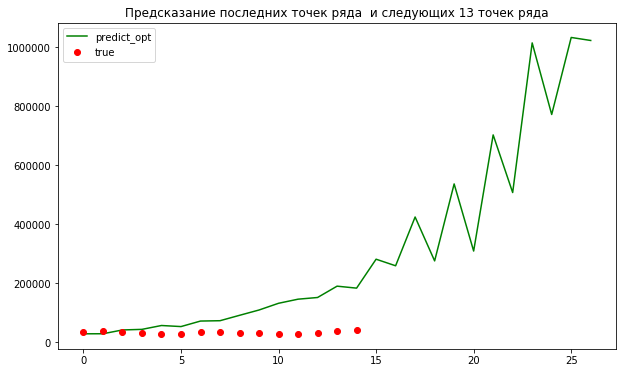

In [254]:
pred_dynamic = results.forecast(27)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(27)

plt.figure(figsize =(10,6))
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-15:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 13 точек ряда')
plt.legend()

plt.show()

**5. Оцените результат моделирования**

Какой то бред получился. Нужна помощь

Возможно причина в том, что у нас кол-во заражений растет по экспоненте и это не улавливается ARIMA?

**6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA**

Модели где есть линейные зависимости. ?